# INF-510, v0.32, Claudio Torres, ctorres@inf.utfsm.cl. DI-UTFSM
## Textbook: Lloyd N. Trefethen, Spectral Methods in MATLAB, SIAM, Philadelphia, 2000

# Spectral differentiation++

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.sparse.linalg as sp
# We are adding all sympy just to reduce the length of the expressions used.
# For instance, instead of using sym.exp we just use
from sympy import *
import sympy as sym
from scipy.linalg import toeplitz
import ipywidgets as widgets
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
sym.init_printing()

def plot_matrices_with_values(ax,M):
    N=M.shape[0]
    cmap = plt.get_cmap('GnBu')
    ax.matshow(M, cmap=cmap)
    for i in np.arange(0, N):
        for j in np.arange(0, N):
            ax.text(i, j, '{:.2f}'.format(M[i,j]), va='center', ha='center', color='r')

Defining some symbolic variables

In [123]:
N = 10
y = sym.Symbol('y', real=True)
f = exp(sin(pi*y))
fv = sym.lambdify([y], f, 'numpy')
fp = sym.diff(f)
fpv = sym.lambdify([y], fp, 'numpy')
fp2 = sym.diff(fp)
fp2v = sym.lambdify([y], fp2, 'numpy')
# We remove the first point since we consider periodic boundary conditions
x = np.linspace(-1,1,N+1)[1:]
xx = np.linspace(-1,1,10*N)
u = fv(x)

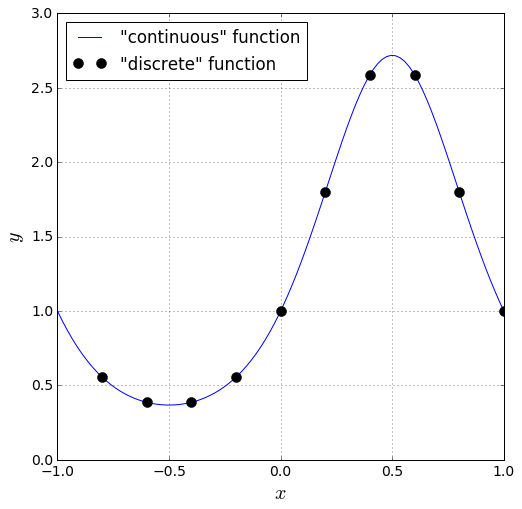

In [124]:
# The variable M is used for changing the default size of the figures
M=8
plt.figure(figsize=(M,M))
# This plots the "continuous" function
plt.plot(xx,fv(xx),'-',label='"continuous" function')
# This plots the "discrete" function
plt.plot(x,u,'k.',markersize=20,label='"discrete" function')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.legend(loc=2)
plt.show()

## My First Differentiation Matrix

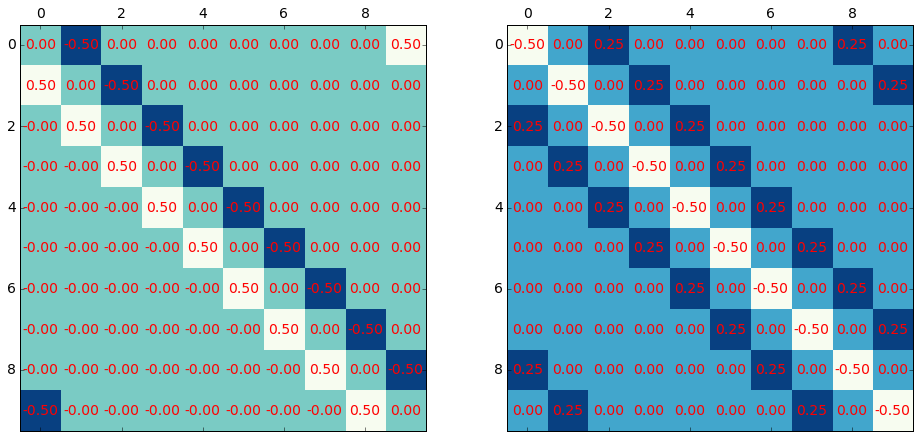

In [125]:
def my_D(N):
    h=2./(N)
    c=np.zeros(N)
    c[1]=-1
    c[-1]=1
    D=toeplitz(c/(2.*h),r=-c/(2.*h))
    return D    
def show_my_D(N):
    D=my_D(N)
    h = 2./N
    
    # We multiply by h just to cancel out its dependency   
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*M,M))
    # First derivative
    plot_matrices_with_values(ax1,D*h)
    # 'Second' derivative
    plot_matrices_with_values(ax2,np.dot(D,D)*(h)**2)
    plt.show()
    
widgets.interact(show_my_D,N=(2,10))

## Let's differentiate our discrete function!

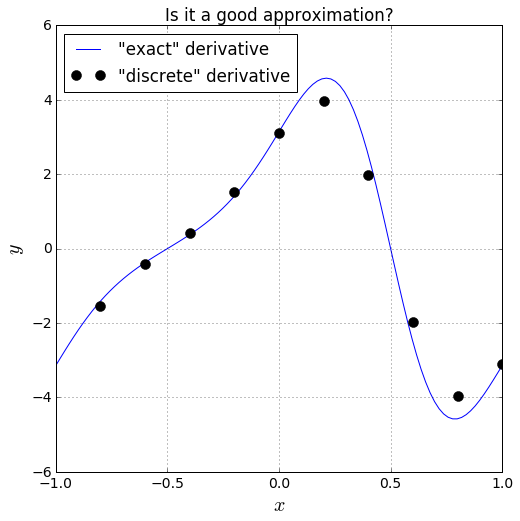

<function __main__.show_discrete_derivate>

In [126]:
def show_discrete_derivate(N=10):
    D=my_D(N)
    D2=np.dot(D,D)
    x = np.linspace(-1,1,N+1)[1:]
    xx = np.linspace(-1,1,10*N)
    u = fv(x)
    plt.figure(figsize=(M,M))
    # This is the "exact" derivative
    plt.plot(xx,fpv(xx),'-',label='"exact" derivative')
    # Here we differentiate our "discrete" function
    Up=np.dot(D,u)
    plt.plot(x,Up,'k.',markersize=20,label='"discrete" derivative')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.grid(True)
    plt.legend(loc='best')
    plt.title('Is it a good approximation?')
    plt.show()
widgets.interact(show_discrete_derivate,N=(5,100,2))

## Let's compute the second derivate!

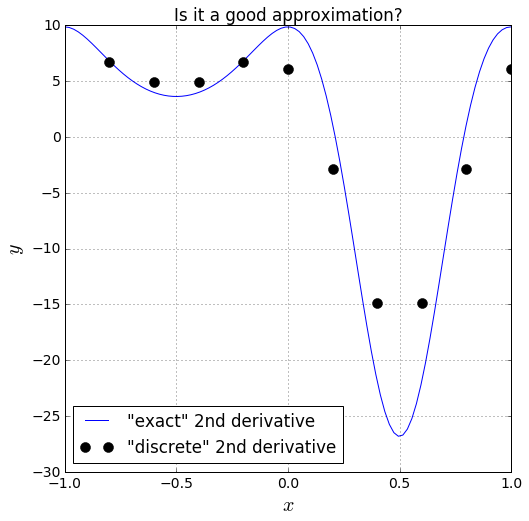

<function __main__.show_discrete_2nd_derivate>

In [127]:
def show_discrete_2nd_derivate(N=10):
    D=my_D(N)
    D2=np.dot(D,D)
    x = np.linspace(-1,1,N+1)[1:]
    xx = np.linspace(-1,1,10*N)
    u = fv(x)
    plt.figure(figsize=(M,M))
    plt.plot(xx,fp2v(xx),'-',label='"exact" 2nd derivative')
    plt.plot(x,np.dot(D2,u),'k.',markersize=20,label='"discrete" 2nd derivative')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.grid(True)
    plt.legend(loc='best')
    plt.title('Is it a good approximation?')
    plt.show()
widgets.interact(show_discrete_2nd_derivate,N=(5,100,1))

## Let's study how fast our approximation converges.

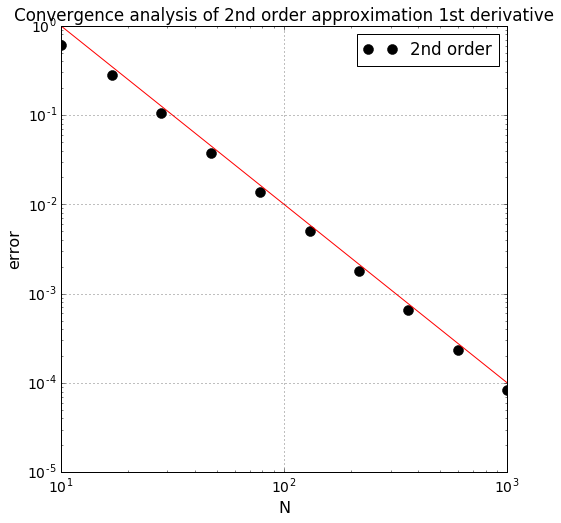

In [128]:
Ne = 10
errors=np.zeros(Ne)
Ns = np.ceil(np.logspace(1,3,Ne))
for i in np.arange(Ne):
    N = int(Ns[i])
    D = my_D(N)
    x = np.linspace(-1,1,N+1)[1:]
    u = fv(x)
    Up = np.dot(D,u)
    up = fpv(x)
    errors[i] = np.linalg.norm(Up-up,np.inf)
plt.figure(figsize=(M,M))
plt.loglog(Ns,errors,'k.',markersize=20,label='2nd order')
plt.loglog(Ns,100*Ns**(-2),'r',markersize=20)
plt.xlabel('N',fontsize=16)
plt.ylabel('error',fontsize=16)
plt.grid(True)
plt.title('Convergence analysis of 2nd order approximation 1st derivative')
plt.legend(loc='best')
plt.show()

## Can we find a faster approximation?

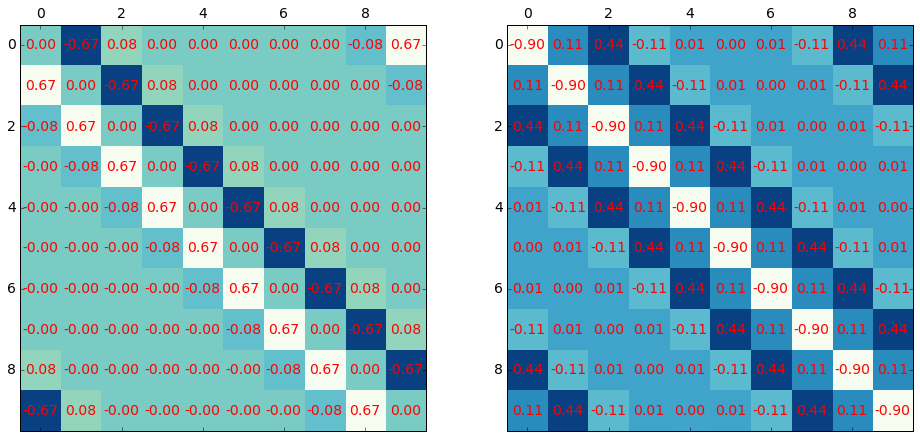

In [129]:
def my_D4th(N):
    h=2./N
    c=np.zeros(N)
    c[1]=-2./3.
    c[2]=1./12.
    c[-1]=2./3.
    c[-2]=-1./12.
    D=toeplitz(c/h,r=-c/h)
    return D
def show_my_D4th(N):
    D=my_D4th(N)
    h = 2./N
    # We multiply by h just to cancel out its dependency   
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*M,M))
    # First derivative
    plot_matrices_with_values(ax1,D*h)
    # 'Second' derivative
    plot_matrices_with_values(ax2,np.dot(D,D)*(h)**2)
    plt.show()
widgets.interact(show_my_D4th,N=(3,10,1))

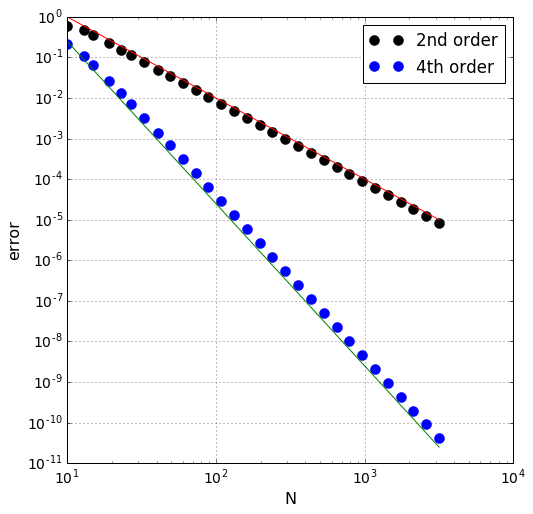

In [130]:
Ne = 30
errors=np.zeros(Ne)
errors4th=np.zeros(Ne)
Ns = np.ceil(np.logspace(1,3.5,Ne))
for i in np.arange(Ne):
    N = int(Ns[i])
    D = my_D(N)
    D4th = my_D4th(N)
    x = np.linspace(-1,1,N+1)[1:]
    u = fv(x)
    Up = np.dot(D,u)
    Up4th = np.dot(D4th,u)
    up = fpv(x)
    errors[i] = np.linalg.norm(Up-up,np.inf)
    errors4th[i] = np.linalg.norm(Up4th-up,np.inf)

plt.figure(figsize=(M,M))
plt.loglog(Ns,errors,'k.',markersize=20,label='2nd order')
plt.loglog(Ns,errors4th,'b.',markersize=20,label='4th order')
plt.loglog(Ns,100*Ns**(-2),'r',markersize=20)
plt.loglog(Ns,2500*Ns**(-4),'g',markersize=20)
plt.xlabel('N',fontsize=16)
plt.ylabel('error',fontsize=16)
plt.grid(True)
plt.legend(loc='best')
plt.show()

# Can we find something even better?

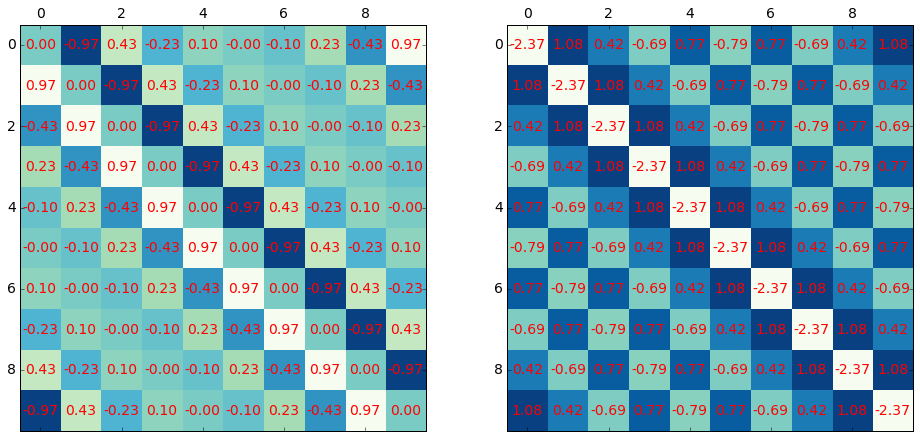

In [131]:
def my_D_spec(N):
    h=(2./N)*np.pi
    c=np.zeros(N)
    j=np.arange(1,N)
    c[1:]=0.5*((-1)**j)*(np.tan(j*h/2.)**(-1))
    r=np.zeros(N)
    r[0]=c[0]
    r[1:]=c[-1:0:-1]
    D=np.pi*toeplitz(c,r=r)
    return D
def  show_my_D_spec(N):
    D=my_D_spec(N)
    h = 2./N
    # We multiply by h just to cancel out its dependency   
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*M,M))
    # First derivative
    plot_matrices_with_values(ax1,D*h)
    # 'Second' derivative
    plot_matrices_with_values(ax2,np.dot(D,D)*(h)**2)
    plt.show()
widgets.interact(show_my_D_spec,N=(3,10,1))

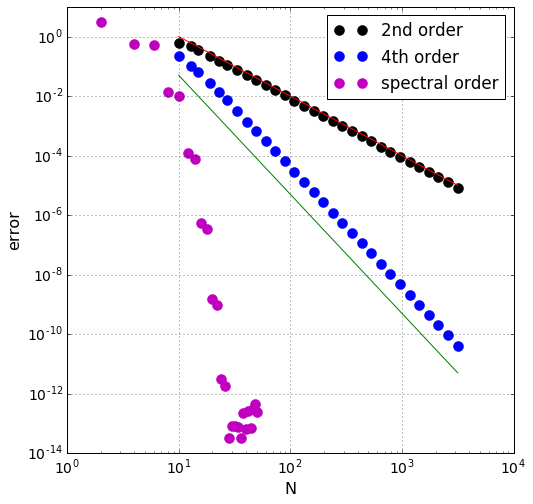

In [15]:
Ne = 30
errors=np.zeros(Ne)
errors4th=np.zeros(Ne)
Ns = np.ceil(np.logspace(1,3.5,Ne))
for i in np.arange(Ne):
    N = int(Ns[i])
    D = my_D(N)
    D4th = my_D4th(N)
    x = np.linspace(-1,1,N+1)[1:]
    u = fv(x)
    Up = np.dot(D,u)
    Up4th = np.dot(D4th,u)
    up = fpv(x)
    errors[i] = np.linalg.norm(Up-up,np.inf)
    errors4th[i] = np.linalg.norm(Up4th-up,np.inf)
    
NsS = np.ceil(np.arange(2,51,2))
NeS= NsS.shape[0]
errorsSpectral=np.zeros(NeS)
for i in np.arange(NeS):
    N = int(NsS[i])
    DSpectral = my_D_spec(N)
    x = np.linspace(-1,1,N+1)[1:]
    u = fv(x)
    UpSpectral = np.dot(DSpectral,u)
    up = fpv(x)
    errorsSpectral[i] = np.linalg.norm(UpSpectral-up,np.inf)    

plt.figure(figsize=(M,M))
plt.loglog(Ns,errors,'k.',markersize=20,label='2nd order')
plt.loglog(Ns,errors4th,'b.',markersize=20,label='4th order')
plt.loglog(NsS,errorsSpectral,'m.',markersize=20,label='spectral order')
plt.loglog(Ns,100*Ns**(-2),'r',markersize=20)
plt.loglog(Ns,500*Ns**(-4),'g',markersize=20)
plt.xlabel('N',fontsize=16)
plt.ylabel('error',fontsize=16)
plt.grid(True)
plt.legend(loc='best')
plt.show()

# Bonus

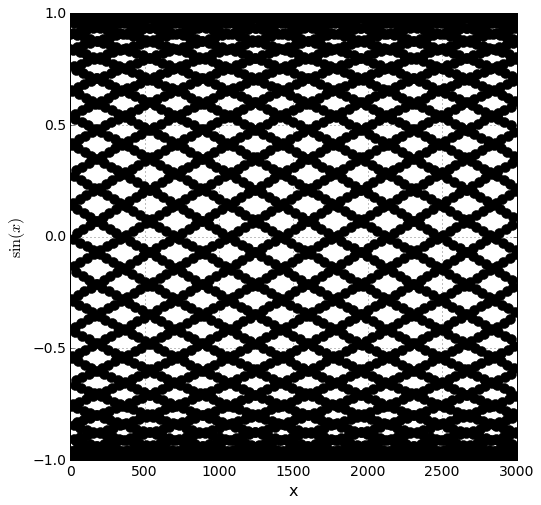

In [16]:
x=np.arange(1,3001)
plt.figure(figsize=(M,M))
plt.plot(x,np.sin(x),'k.',markersize=20)
plt.xlabel('x',fontsize=16)
plt.ylabel('$\sin(x)$',fontsize=16)
plt.grid(True)
plt.show()

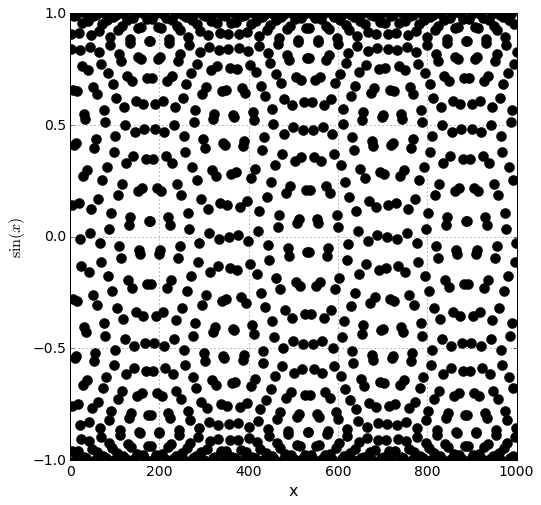

In [17]:
x=np.arange(1,1001)
plt.figure(figsize=(M,M))
plt.plot(x,np.sin(x),'k.',markersize=20)
plt.xlabel('x',fontsize=16)
plt.ylabel('$\sin(x)$',fontsize=16)
plt.grid(True)
plt.show()